### import all necessaries libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
#from sklearn.cross_validation import train_test_split  --old
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


In [3]:
np.set_printoptions(suppress=True)

In [4]:
%matplotlib inline

### Read Data

In [7]:
df_data=pd.read_csv('../kc_house_data.csv')

#### check some data

In [8]:
df_data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]


id:
a notation for a house

date:
Date house was sold

price:
Price is prediction target

bedrooms:
Number of Bedrooms/House

bathrooms:
Number of bathrooms/House

sqft_living:
square footage of the home

sqft_lot:
square footage of the lot

floors:
Total floors (levels) in house

waterfront:
House which has a view to a waterfront

view:
Has been viewed

condition:
How good the condition is ( Overall )

grade:
overall grade given to the housing unit, based on King County grading system

sqft_above:
square footage of house apart from basement

sqft_basement:
square footage of the basement

yr_built:
Built Year

yr_renovated:
Year when house was renovated

zipcode:
zip

lat:
Latitude coordinate

long:
Longitude coordinate

sqft_living15:
Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

sqft_lot15:
lotSize area in 2015(implies-- some renovations)


### Preprocessing 

In [9]:
df_data['date'].head()

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
Name: date, dtype: object

In [10]:
df_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### Analyze some features and create some new features

In [11]:
df_data['age'] = df_data.apply( lambda rec: int( rec.date[0:4] ) - rec.yr_built, axis = 1 )

In [12]:
df_data[['date','yr_built','age']].head()

date  yr_built  age
0  20141013T000000      1955   59
1  20141209T000000      1951   63
2  20150225T000000      1933   82
3  20141209T000000      1965   49
4  20150218T000000      1987   28

In [13]:
df_data['year'] = df_data.apply( lambda rec: int( rec.date[0:4] ), axis = 1 )

In [14]:
df_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age', 'year'],
      dtype='object')

In [15]:
#these are all numeric features
features=['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'view', 'condition', 'grade','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15','age','year']
target=['price']    


Think on categorical features. You can add them too. Read about one hot encoding and pd.get_dummies()

In [16]:
final_df=df_data[features+target]

In [17]:
final_df.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  condition  grade  \
0         3       1.00         1180      5650     1.0     0          3      7   
1         3       2.25         2570      7242     2.0     0          3      7   
2         2       1.00          770     10000     1.0     0          3      6   
3         4       3.00         1960      5000     1.0     0          5      7   
4         3       2.00         1680      8080     1.0     0          3      8   

   sqft_above  sqft_basement  sqft_living15  sqft_lot15  age  year     price  
0        1180              0           1340        5650   59  2014  221900.0  
1        2170            400           1690        7639   63  2014  538000.0  
2         770              0           2720        8062   82  2015  180000.0  
3        1050            910           1360        5000   49  2014  604000.0  
4        1680              0           1800        7503   28  2015  510000.0

In [18]:
final_df.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  21613.000000  21613.000000  21613.000000  2.161300e+04  21613.000000   
mean       3.370842      2.114757   2079.899736  1.510697e+04      1.494309   
std        0.930062      0.770163    918.440897  4.142051e+04      0.539989   
min        0.000000      0.000000    290.000000  5.200000e+02      1.000000   
25%        3.000000      1.750000   1427.000000  5.040000e+03      1.000000   
50%        3.000000      2.250000   1910.000000  7.618000e+03      1.500000   
75%        4.000000      2.500000   2550.000000  1.068800e+04      2.000000   
max       33.000000      8.000000  13540.000000  1.651359e+06      3.500000   

               view     condition         grade    sqft_above  sqft_basement  \
count  21613.000000  21613.000000  21613.000000  21613.000000   21613.000000   
mean       0.234303      3.409430      7.656873   1788.390691     291.509045   
std        0.766318      0.650743      1.175459    828.090978     442.575043   
min        0.000000      1.000000      1.000000    290.000000       0.000000   
25%        0.000000      3.000000      7.000000   1190.000000       0.000000   
50%        0.000000      3.000000      7.000000   1560.000000       0.000000   
75%        0.000000      4.000000      8.000000   2210.000000     560.000000   
max        4.000000      5.000000     13.000000   9410.000000    4820.000000   

       sqft_living15     sqft_lot15           age          year         price  
count   21613.000000   21613.000000  21613.000000  21613.000000  2.161300e+04  
mean     1986.552492   12768.455652     43.317818   2014.322954  5.400881e+05  
std       685.391304   27304.179631     29.375493      0.467616  3.671272e+05  
min       399.000000     651.000000     -1.000000   2014.000000  7.500000e+04  
25%      1490.000000    5100.000000     18.000000   2014.000000  3.219500e+05  
50%      1840.000000    7620.000000     40.000000   2014.000000  4.500000e+05  
75%      2360.000000   10083.000000     63.000000   2015.000000  6.450000e+05  
max      6210.000000  871200.000000    115.000000   2015.000000  7.700000e+06

### Do Exploratory Data Analysis

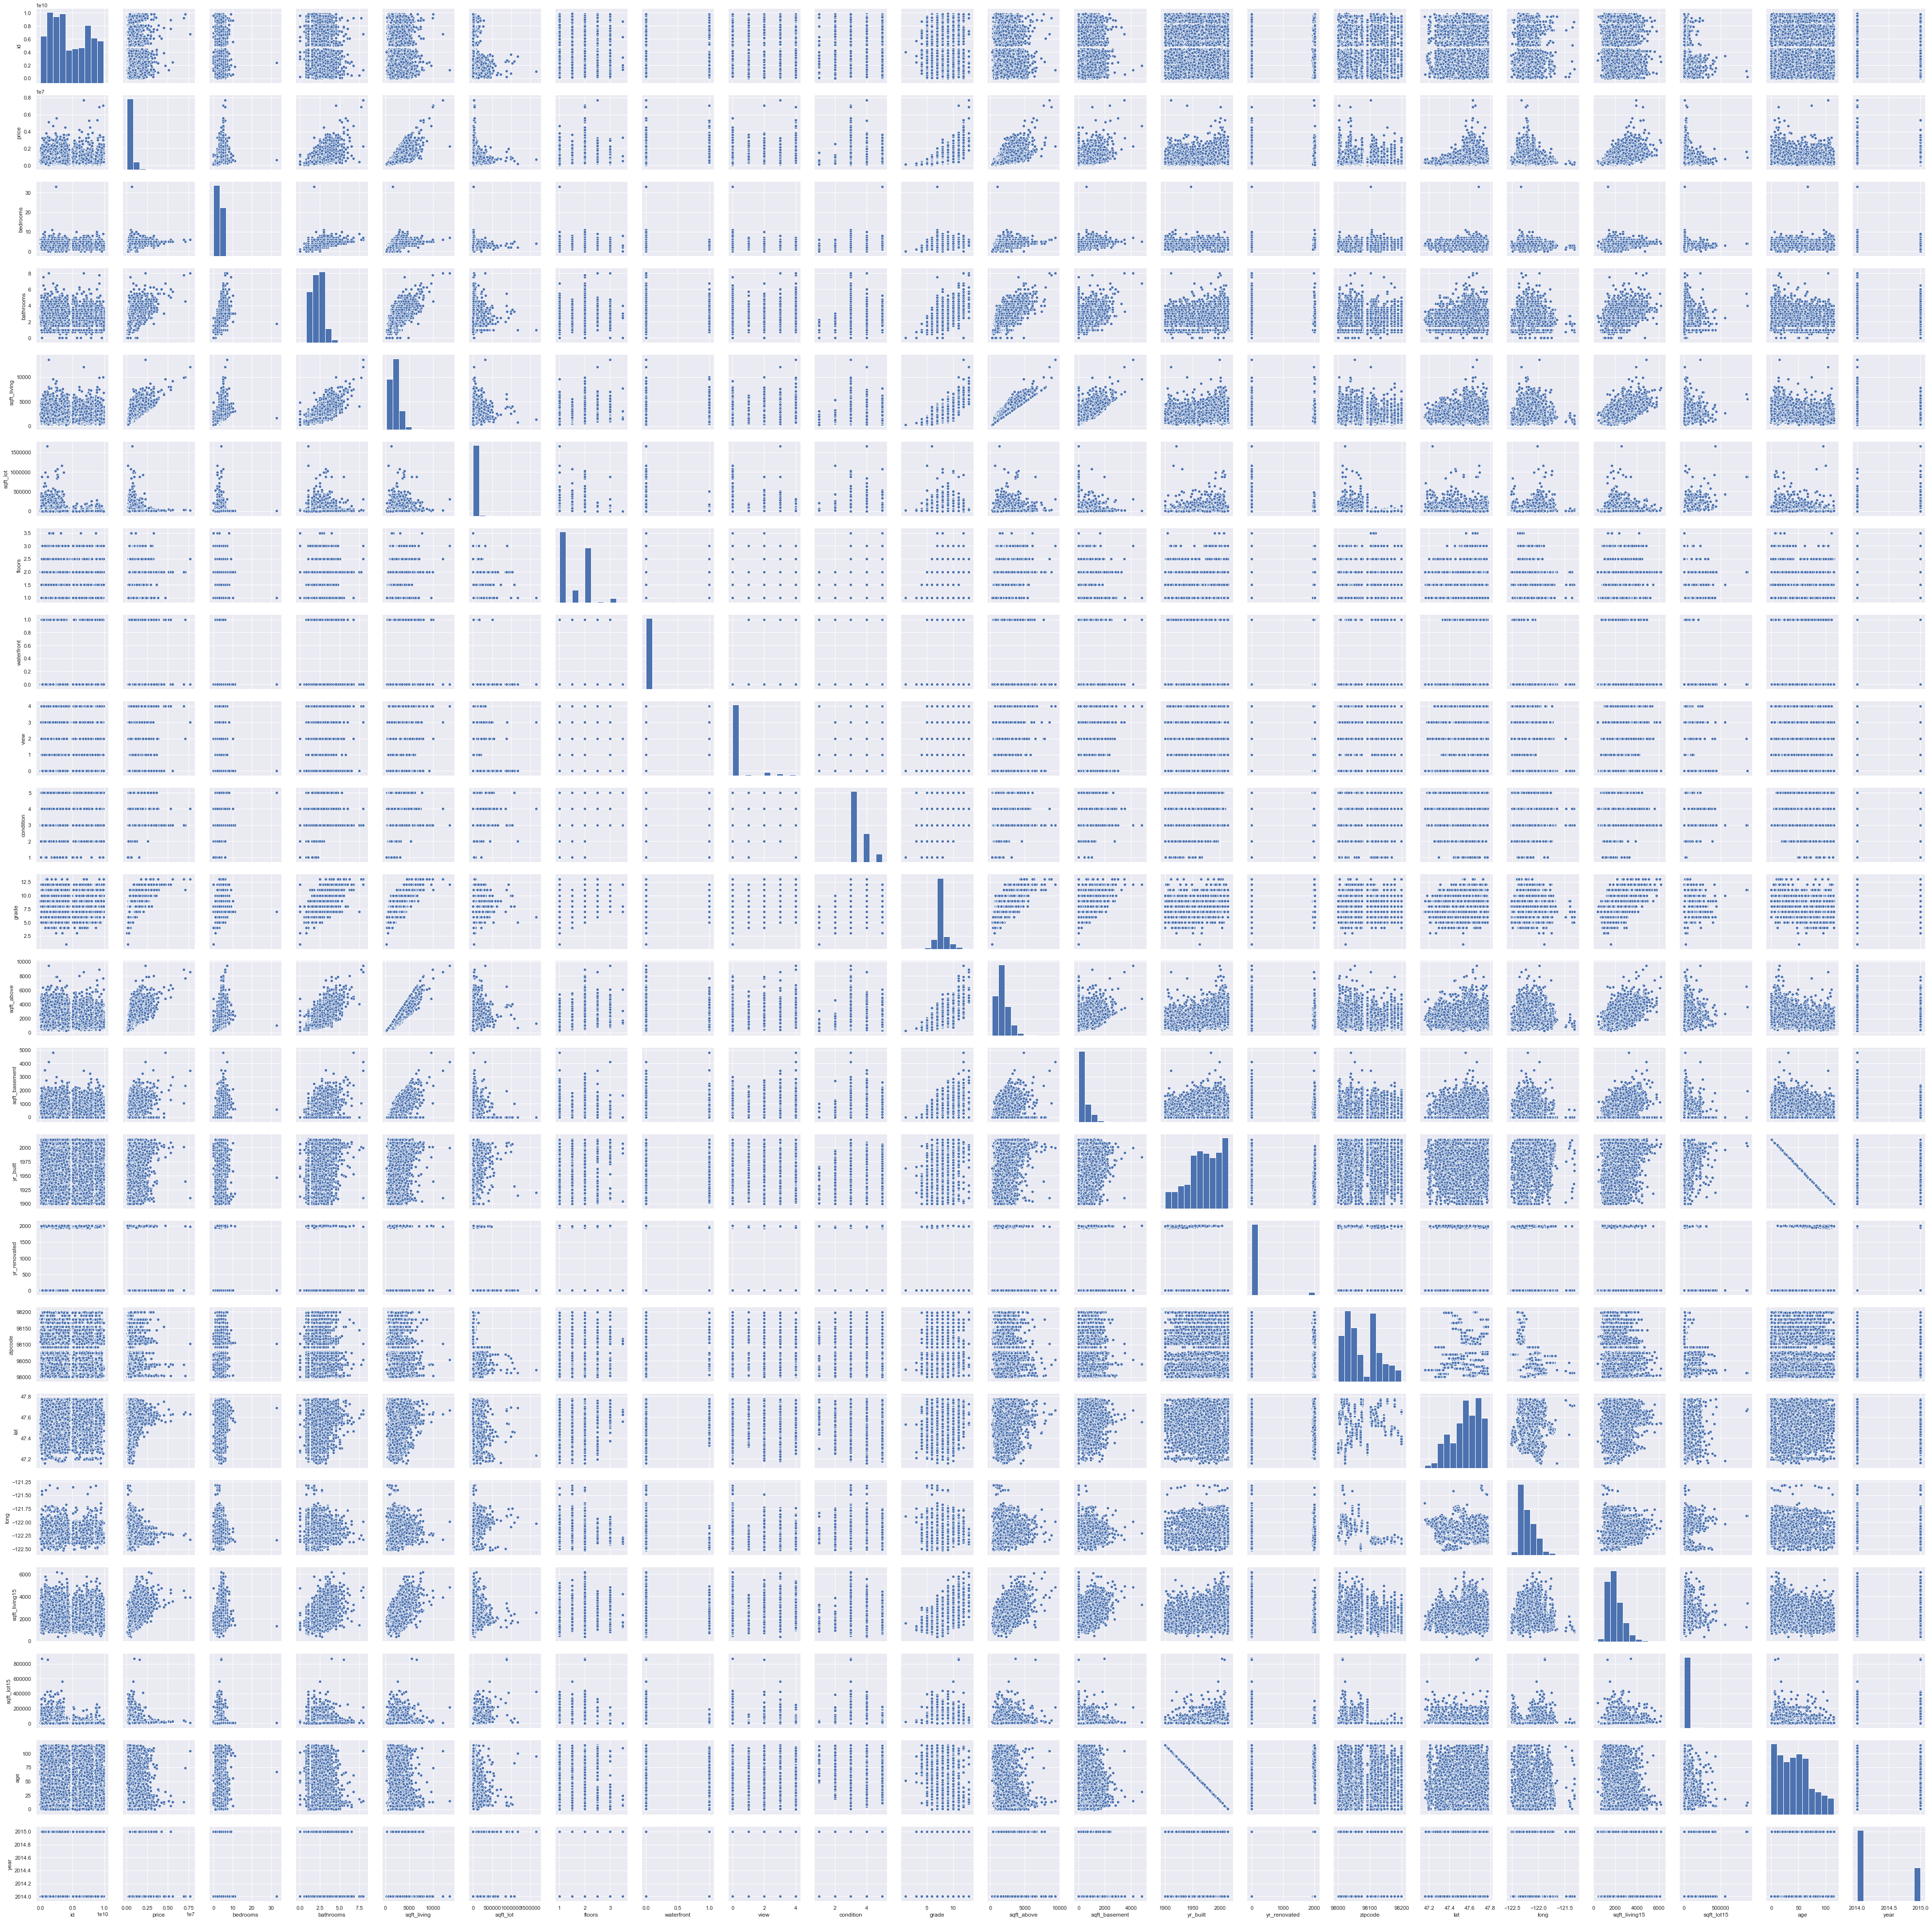

In [19]:
sns.set(color_codes=True)
sns.pairplot(data=df_data)

#### Correlation Matrix

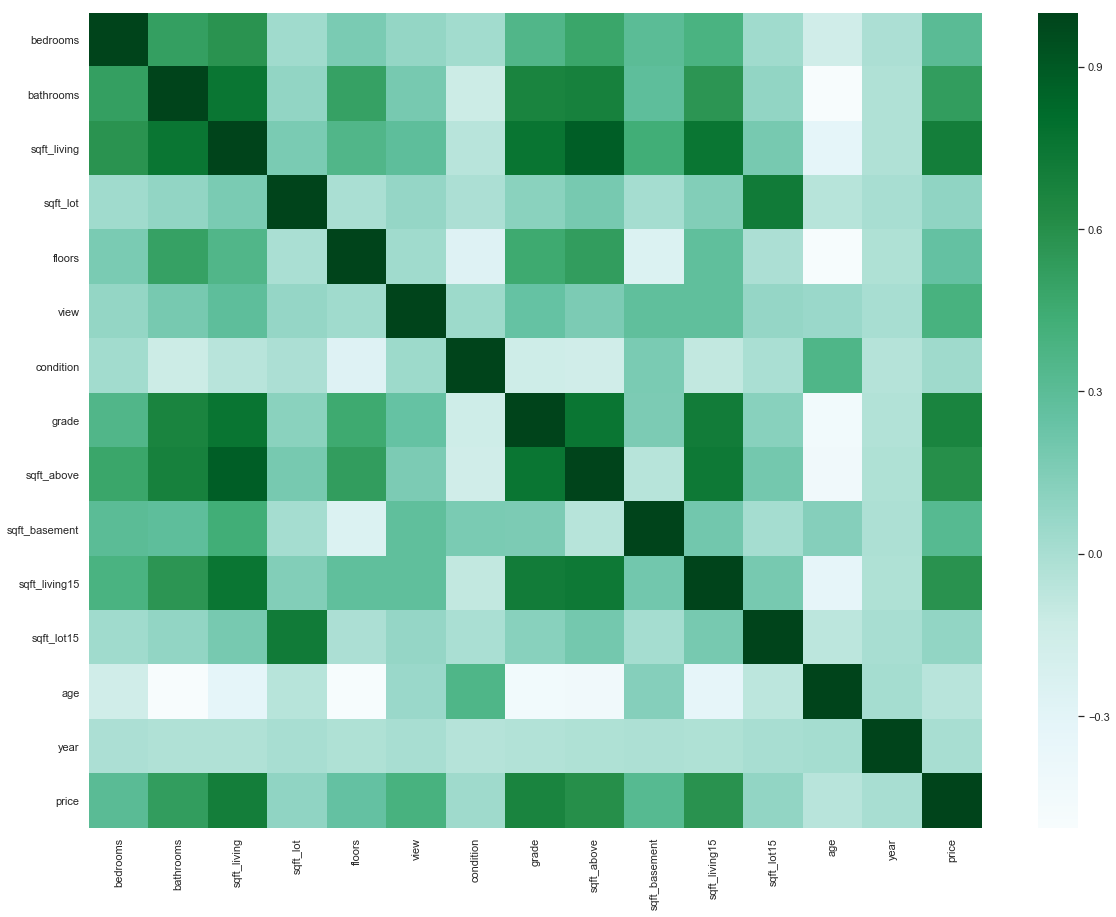

In [21]:
plt.subplots(figsize=(20,15))
sns.heatmap( final_df.corr(),cmap='BuGn')

### Building Model

#### Split dataset into Train and Test (80% - training, 20% - Test). Cross Validation Libraries of Sckit Learn automatically creates validation set out of training so we dont need to worry about that

In [24]:
train_data,test_data = train_test_split(final_df, test_size = 0.2,random_state=10)

In [26]:
print("Train: ",train_data.shape)
print("Test: ",test_data.shape)

Train:  (17290, 15)
Test:  (4323, 15)


Check

In [27]:
print(float(train_data.shape[0]) / float(df_data.shape[0]))
print(float(test_data.shape[0]) / float(df_data.shape[0]))

0.7999814926201823
0.2000185073798177


In [28]:
train_data.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  17290.000000  17290.000000  17290.000000  1.729000e+04  17290.000000   
mean       3.372701      2.115862   2080.230943  1.496649e+04      1.491151   
std        0.935922      0.771611    915.601503  3.954196e+04      0.538696   
min        0.000000      0.000000    370.000000  5.720000e+02      1.000000   
25%        3.000000      1.750000   1430.000000  5.040000e+03      1.000000   
50%        3.000000      2.250000   1910.000000  7.620000e+03      1.500000   
75%        4.000000      2.500000   2550.000000  1.072300e+04      2.000000   
max       33.000000      8.000000  13540.000000  1.164794e+06      3.500000   

               view     condition         grade    sqft_above  sqft_basement  \
count  17290.000000  17290.000000  17290.000000  17290.000000   17290.000000   
mean       0.235396      3.413245      7.664488   1786.008444     294.222499   
std        0.767490      0.653362      1.173943    825.928205     443.879716   
min        0.000000      1.000000      3.000000    370.000000       0.000000   
25%        0.000000      3.000000      7.000000   1190.000000       0.000000   
50%        0.000000      3.000000      7.000000   1560.000000       0.000000   
75%        0.000000      4.000000      8.000000   2200.000000     570.000000   
max        4.000000      5.000000     13.000000   9410.000000    4820.000000   

       sqft_living15     sqft_lot15           age          year         price  
count   17290.000000   17290.000000  17290.000000  17290.000000  1.729000e+04  
mean     1989.023250   12795.067206     43.422152   2014.320359  5.402433e+05  
std       689.034165   27379.350862     29.363376      0.466628  3.632544e+05  
min       620.000000     651.000000     -1.000000   2014.000000  7.500000e+04  
25%      1490.000000    5100.000000     18.000000   2014.000000  3.200000e+05  
50%      1840.000000    7620.000000     39.500000   2014.000000  4.500000e+05  
75%      2360.000000   10125.000000     63.000000   2015.000000  6.469500e+05  
max      6210.000000  871200.000000    115.000000   2015.000000  6.885000e+06

You can perform further analysis on your training data to understand behaviour of data

#### break it into X(features) and y(labels)

In [29]:
train_X=train_data[features]
train_y=train_data[target]

In [30]:
test_X=test_data[features]
test_y=test_data[target]

#### Normalize

In [31]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
scaler.fit(train_X)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
train_X_normalized=scaler.transform(train_X)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [36]:
test_X_normalized=scaler.transform(test_X)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


#### Lets try Simple Linear Regression First

In [37]:
from sklearn.linear_model import LinearRegression

Fit the model on training set

In [38]:
linreg = LinearRegression()
linreg.fit( train_X_normalized, train_y )


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Check the cofficient and intercept of Linear Regression Model

In [39]:
linreg.coef_

array([[-37984.59666622,  33683.15764326,  73105.03271917,
         -3922.79172383,  13266.06255322,  53717.95476023,
         14078.10821585, 144338.83560096,  63078.38557504,
         33425.40684082,  18651.90628177, -11821.73766362,
        103068.5230401 ,  10741.09766392]])

In [40]:
for idx, col_name in enumerate(train_X.columns):
    print("The coefficient for {} is {}".format(col_name, linreg.coef_[0][idx]))

The coefficient for bedrooms is -37984.59666622488
The coefficient for bathrooms is 33683.15764326349
The coefficient for sqft_living is 73105.0327191659
The coefficient for sqft_lot is -3922.791723825216
The coefficient for floors is 13266.062553222106
The coefficient for view is 53717.95476022971
The coefficient for condition is 14078.108215850381
The coefficient for grade is 144338.83560095952
The coefficient for sqft_above is 63078.38557503508
The coefficient for sqft_basement is 33425.406840820404
The coefficient for sqft_living15 is 18651.906281773085
The coefficient for sqft_lot15 is -11821.737663616394
The coefficient for age is 103068.52304009744
The coefficient for year is 10741.097663916351


In [41]:
intercept = linreg.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 540243.2680161969


In [266]:
#plt.scatter(train_X['grade'],train_y)

In [42]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Check from equation

#### Check Learning Curve of our model

In [43]:
from sklearn.model_selection import learning_curve

In [44]:
train_sizes, train_errors, validation_errors = learning_curve(
                                                   estimator =  LinearRegression(), X = train_X,
                                                   y = train_y ,  cv=5,
                                                   scoring = 'neg_mean_squared_error',train_sizes=np.linspace(0.01,1,num=10))

In [45]:
np.set_printoptions(suppress=True)

In [46]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [47]:
train_error_mean = -np.mean(train_errors,axis = 1)
validation_error_mean =-np.mean(validation_errors,axis = 1)

print('Mean training error\n\n', pd.Series(train_error_mean, index = train_sizes))
print('\n') # separator
print('\nMean validation error\n\n',pd.Series(validation_error_mean, index = train_sizes))

Mean training error

 138     26852123001.270
1659    41269153627.153
3181    42456863696.428
4702    43664891144.685
6224    46434152661.876
7745    46539214662.573
9267    46301273892.516
10788   47543199726.713
12310   47949746533.382
13832   47585031729.733
dtype: float64



Mean validation error

 138     54641790054.124
1659    48134871739.984
3181    48153340749.957
4702    48198818638.430
6224    48091069475.266
7745    48065057664.077
9267    48106183918.339
10788   48070195627.719
12310   48031086383.262
13832   48004684102.736
dtype: float64


(10000000000.0, 56031273406.766754)

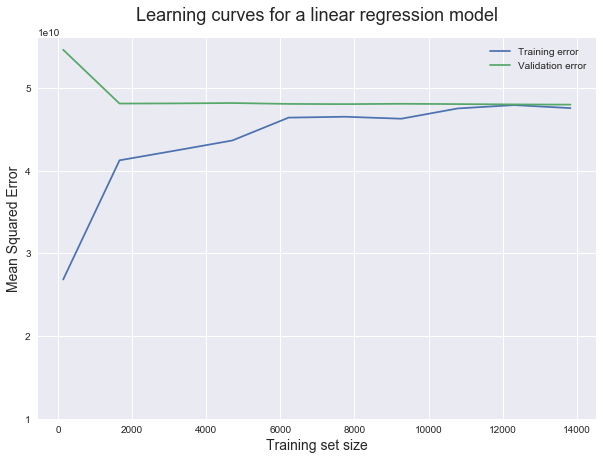

In [48]:
fig = plt.figure(figsize=(10,7))

plt.style.use('seaborn')

plt.plot(train_sizes, train_error_mean, label = 'Training error')
plt.plot(train_sizes, validation_error_mean, label = 'Validation error')

plt.ylabel('Mean Squared Error', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(1e10)


Analyze the learning curve. Adding data here will not help us.

### Metrics: Performance on unseen dataset

In [49]:
#pred=pd.DataFrame(linreg.predict( test_X_normalized ) )
pred=pd.DataFrame(linreg.predict( test_X_normalized ) )
pred.columns=['predicted']
actual=pd.DataFrame(test_y.reset_index()['price'])
actual.columns=['actual']

In [50]:
lin_reg_pred=pd.concat([actual,pred],axis=1)

In [51]:
lin_reg_pred.head(100)

actual   predicted
0   323000.000  460891.153
1   690000.000  618934.909
2   142000.000 -590295.230
3   560000.000  394475.974
4   545000.000  377677.870
5   259500.000  248204.232
6   420000.000  444287.687
7   305000.000  399086.930
8   261500.000  458832.217
9  1155000.000 1106094.164
10  590000.000  695024.075
11  455600.000  442694.655
12 1450000.000 1570526.567
13  875000.000  738318.813
14 1045000.000  902893.056
15  649950.000  654286.159
16  690000.000  746831.393
17  264950.000  208364.661
18  610000.000  631422.581
19  450000.000  457997.002
20  335000.000  223036.720
21  245000.000  286607.467
22  435000.000  415301.580
23  235000.000  362100.514
24  921500.000  824303.657
25  168000.000  231073.395
26  388500.000  577309.112
27  878000.000 1091443.359
28  750000.000  967553.322
29  540000.000  487190.034
..         ...         ...
70  423000.000  464022.110
71  236500.000  421138.796
72  554000.000  521676.410
73  456000.000  482457.799
74  448500.000  489890.362
75  342000.000  319951.033
76  580000.000  885403.482
77  250000.000  279880.019
78  480000.000  467449.056
79  540000.000  508629.898
80  315000.000  430358.262
81  230000.000  249327.416
82  750000.000  547860.617
83  690000.000 1066749.548
84 1310000.000 1113558.053
85  340000.000  424930.688
86  593777.000  378755.625
87  299000.000  244175.178
88  610000.000  641819.872
89  850830.000  966871.752
90  330000.000  310577.913
91  440000.000  223815.902
92  715000.000  701518.839
93  755000.000  452348.694
94  260000.000  256321.655
95  370000.000  689192.357
96  482500.000  324213.679
97  332000.000  448405.314
98  772000.000  381819.792
99  449000.000  712436.557

[100 rows x 2 columns]

In [52]:
from sklearn import metrics

Root Mean Squared Error

In [53]:
np.sqrt( metrics.mean_squared_error( lin_reg_pred.actual, lin_reg_pred.predicted ) )

230308.02017586466

In [54]:
metrics.r2_score( lin_reg_pred.actual, lin_reg_pred.predicted )

0.6369347805559009

#### Decision tree regressor

In [55]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
from sklearn.metrics import mean_squared_error

Fit the model on training set

In [57]:
# Create decision tree classifer object
decisiontreereg = DecisionTreeRegressor(random_state=0,max_depth=1)

In [58]:
decisiontreereg.fit( train_X, train_y )

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [59]:
decisiontreereg.get_params()

{'criterion': 'mse',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

Lets check the training error

In [60]:
pred=decisiontreereg.predict(train_X)

In [61]:
np.sqrt( metrics.mean_squared_error( np.array(train_y).squeeze(), pred ) )

297516.5873161404

##### Cross Validation

Lets cross validate and find the best parameter for decision tree model before we test it on our final unseen dataset

In [63]:
#from sklearn.grid_search import GridSearchCV  --old
from sklearn.model_selection import GridSearchCV

In [64]:
tree_params_ = { 'max_depth' : [1,2,3, 4, 5, 6, 7, 8, 9, 10] }

In [65]:
tree_reg = DecisionTreeRegressor()
tree_grid = GridSearchCV( tree_reg,
                       tree_params_,
                       scoring = "neg_mean_squared_error" ,
                       cv=5,verbose=2)

In [66]:


tree_grid.fit( train_X, train_y )



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.0s
[CV] max_depth=2 .....................................................
[CV] ...................................... max_depth=2, total=   0.0s
[CV] max_depth=2 .....................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................................... max_depth=3, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ...................................... max_depth=3, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ...................................... max_depth=3, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ...................................... max_depth=3, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ...................................... max_depth=3, total=   0.0s
[CV] max_depth=4 .....................................................
[CV] ...................................... max_depth=4, total=   0.0s
[CV] max_depth=4 .....................................................
[CV] ...................................... max_depth=4, total=   0.0s
[CV] max_depth=4 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [67]:
tree_grid.best_params_


{'max_depth': 6}

In [68]:
model = tree_grid.best_estimator_

In [69]:
model

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Check your training error

In [70]:
np.sqrt( metrics.mean_squared_error( np.array(train_y).squeeze(), model.predict(train_X) ) )

190793.3325475884

#### Check Validation Curve

In [74]:
#from sklearn.learning_curve import validation_curve --old
from sklearn.model_selection import validation_curve



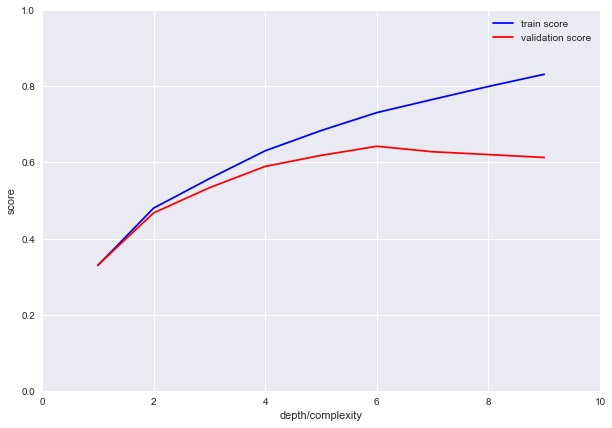

In [75]:
fig = plt.figure(figsize=(10,7))

max_depth = np.arange(1, 10)
#cv is for K fold cross validation
train_score, validation_score = validation_curve(DecisionTreeRegressor(),train_X, train_y.squeeze(),'max_depth', max_depth, cv=5)
plt.plot(max_depth, np.mean(train_score, 1), color='blue', label='train score')
plt.plot(max_depth, np.mean(validation_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlim(0, 10)
plt.xlabel('depth/complexity')
plt.ylabel('score');


Best parameter for decision tree with depth=6

#### Learning Curve

In [76]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [77]:
train_sizes, train_errors, validation_errors = learning_curve(
                                                   estimator =  model, X = train_X,
                                                   y = train_y,  cv=5,
                                                   scoring = 'neg_mean_squared_error',train_sizes=np.linspace(0.01,1,num=10))

In [78]:
train_error_mean = -np.mean(train_errors,axis = 1)
validation_error_mean =-np.mean(validation_errors,axis = 1)

print('Mean training error\n', pd.Series(train_error_mean, index = train_sizes))
print('\n') # separator
print('\nMean validation error\n',pd.Series(validation_error_mean, index = train_sizes))

Mean training error
 138      6304040829.077
1659    22644463485.637
3181    27687695767.231
4702    31170940085.466
6224    33097528379.829
7745    33906249741.927
9267    34715078062.055
10788   34858357014.089
12310   36266466329.071
13832   35484208343.445
dtype: float64



Mean validation error
 138     83747645323.471
1659    58709824867.343
3181    53853854846.116
4702    53417558299.658
6224    58632762602.209
7745    49065207862.171
9267    48445542512.492
10788   47572876209.162
12310   46641969524.967
13832   46851173959.622
dtype: float64


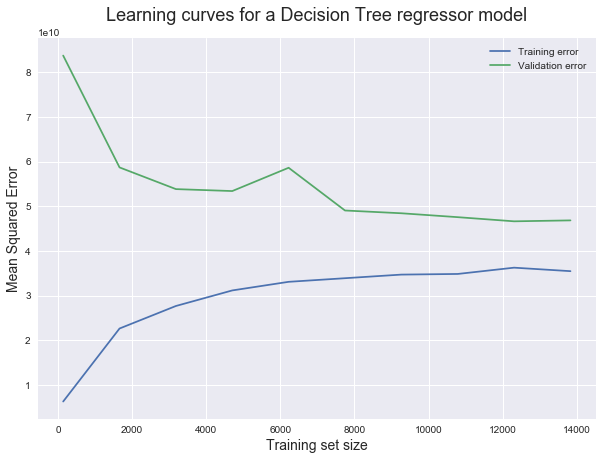

In [79]:
fig = plt.figure(figsize=(10,7))

plt.style.use('seaborn')

plt.plot(train_sizes, train_error_mean, label = 'Training error')
plt.plot(train_sizes, validation_error_mean, label = 'Validation error')

plt.ylabel('Mean Squared Error', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Decision Tree regressor model', fontsize = 18, y = 1.03)
plt.legend()

### Metrics: Performance on unseen/Test dataset

In [80]:
#pred=pd.DataFrame(linreg.predict( test_X_normalized ) )
pred=pd.DataFrame(model.predict( test_X) )
pred.columns=['predicted']
actual=pd.DataFrame(test_y.reset_index()['price'])
actual.columns=['actual']

In [81]:
decisiontree_reg_pred=pd.concat([actual,pred],axis=1)

In [82]:
decisiontree_reg_pred.head(100)

actual   predicted
0   323000.000  400762.070
1   690000.000  746154.167
2   142000.000  312047.692
3   560000.000  403493.033
4   545000.000  319676.114
5   259500.000  331728.125
6   420000.000  400762.070
7   305000.000  409478.626
8   261500.000  403493.033
9  1155000.000 1078004.832
10  590000.000  578981.172
11  455600.000  484405.910
12 1450000.000 1158178.095
13  875000.000  621064.794
14 1045000.000  800985.809
15  649950.000  487154.325
16  690000.000  624931.066
17  264950.000  245972.980
18  610000.000  578981.172
19  450000.000  400762.070
20  335000.000  331728.125
21  245000.000  245972.980
22  435000.000  450813.822
23  235000.000  400762.070
24  921500.000  769358.736
25  168000.000  312047.692
26  388500.000  487154.325
27  878000.000  857329.977
28  750000.000  857329.977
29  540000.000  450813.822
..         ...         ...
70  423000.000  409478.626
71  236500.000  483987.665
72  554000.000  487154.325
73  456000.000  487154.325
74  448500.000  487154.325
75  342000.000  331728.125
76  580000.000 1457200.000
77  250000.000  331728.125
78  480000.000  450813.822
79  540000.000  483987.665
80  315000.000  450813.822
81  230000.000  331728.125
82  750000.000  409478.626
83  690000.000 1087153.854
84 1310000.000  769358.736
85  340000.000  331728.125
86  593777.000  331728.125
87  299000.000  312047.692
88  610000.000  602304.457
89  850830.000  886759.783
90  330000.000  331728.125
91  440000.000  331728.125
92  715000.000  446943.863
93  755000.000  403493.033
94  260000.000  319676.114
95  370000.000  624931.066
96  482500.000  331728.125
97  332000.000  400762.070
98  772000.000  450813.822
99  449000.000  624931.066

[100 rows x 2 columns]

In [83]:
np.sqrt( metrics.mean_squared_error( np.array(test_y).squeeze(), model.predict(test_X) ) )

211959.08031326297

In [84]:
metrics.r2_score( np.array(test_y).squeeze(), model.predict(test_X) )

0.6924819757220115